In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Flux of Methane

In [43]:
######################## Input parameters #########################
files = 200
points_per_file = 100000
cases = ['case_a', 'case_b', 'case_c']        #uniform, lognormal, normal

######################## Initialize processing files #########################
min_v, max_v = -10, -7
x = np.logspace(min_v,max_v,1000)

Data
Case:  case_a  Mean:  5.607616199574094e-08  Var:  5.333964206276527e-15  Skew:  2.246150006490002  Kurtosis:  9.158690939249105  CV:  1.3024071352033642
Fitted
Case:  case_a  mu:  2.3183944250112735e-08  sigma:  1.4926874067011697
Data
Case:  case_b  Mean:  5.2487539335775065e-08  Var:  3.0968740451496026e-15  Skew:  1.9976723151939877  Kurtosis:  8.351200378748421  CV:  1.0602433520219203
Fitted
Case:  case_b  mu:  2.883710313302387e-08  sigma:  1.2250519989496298
Data
Case:  case_c  Mean:  4.168364579206999e-08  Var:  2.8252310395194884e-15  Skew:  2.848551035978771  Kurtosis:  14.385189234089204  CV:  1.2751500365719692
Fitted
Case:  case_c  mu:  2.1208872218510218e-08  sigma:  1.2407231274062216


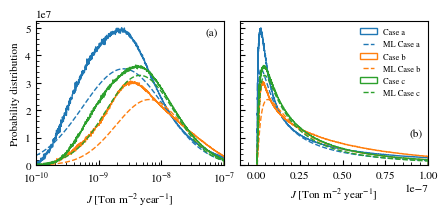

In [44]:
casess = ['Case a', 'Case b', 'Case c']
colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.style.use('stylesheet.mpltstyle_histograms')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4.3, 2), sharey = True)

for counter, case in enumerate(cases):
    data = np.zeros((points_per_file*files, 29))
    ######################## Read files and join them in only one array #########################
    for j in range(files):
        data_file = np.load('../Results/model_eval/'+case+'/wu_eval_'+str(j)+".npy")
        data[j*points_per_file:(j+1)*points_per_file,:] = data_file

    Results = data[:,18]
    print('Data')
    print('Case: ', case, ' Mean: ', np.mean(Results), ' Var: ', np.var(Results), ' Skew: ', sp.stats.skew(Results), ' Kurtosis: ', sp.stats.kurtosis(Results)+3, ' CV: ', np.std(Results)/np.mean(Results))
    ax[0].hist(Results, bins = x, label = casess[counter], density = True, histtype = 'step', linewidth = 1, color = colors[counter])
    ax[1].hist(Results, bins = x, label = casess[counter], density = True, histtype = 'step', linewidth = 1, color = colors[counter])

    print('Fitted')
    s, loc, scale = sp.stats.lognorm.fit(Results, floc = 0)
    print('Case: ', case, ' mu: ', scale, ' sigma: ', s)
    pdf_fitted_automatic = sp.stats.lognorm.pdf(x, s, loc, scale)
    ax[0].plot(x, pdf_fitted_automatic, '--', label = r'ML '+casess[counter], linewidth = 1, color = colors[counter])
    ax[1].plot(x, pdf_fitted_automatic, '--', label = r'ML '+casess[counter], linewidth = 1, color = colors[counter])
    ######################## Histogram #########################


ax[0].set_xlabel(r'$J$ [Ton m$^{-2}$ year$^{-1}$]')
ax[0].set_ylabel('Probability distribution')
ax[0].set_xscale('log')
ax[0].annotate("(a)", xy=(0.9, 0.9), xycoords="axes fraction")
ax[0].set_xlim(1*10**min_v,1*10**max_v)

ax[1].set_xlabel(r'$J$ [Ton m$^{-2}$ year$^{-1}$]')
ax[1].annotate("(b)", xy=(0.9, 0.2), xycoords="axes fraction")
ax[1].set_xlim(-1*10**-8,1e-7)

ax[1].legend()

plt.savefig('../Figures/pdf_J.pdf')
plt.show()

### Diffusion coefficient

In [43]:
######################## Input parameters #########################
files = 100
distributions = ['uniform', 'normal', 'lognormal']        #uniform, lognormal, normal

######################## Initialize processing files #########################
min_v, max_v = -9, -5
x = np.logspace(min_v,max_v,1000)

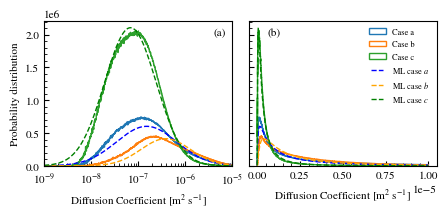

In [44]:
cases = ['Case a', 'Case b', 'Case c']
fitos = []

plt.style.use('stylesheet.mpltstyle_histograms')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(4.3, 2), sharey = True)

for counter,distribution in enumerate(distributions):
    hf = h5py.File("../Wu_Model/Code/"+distribution+"/results_wu_"+distribution+"1.hdf5", 'r')
    Npoints = (np.array((hf.get('Coordinates')).get('Radius'))).size
    hf.close()
    Results = np.zeros(Npoints*files)
    ######################## Read files and join them in only one array #########################
    for j in range (0,files):
        filename = "../Wu_Model/Code/"+distribution+"/results_wu_"+distribution+str(j)+".hdf5"
        hf = h5py.File(filename, 'r')
        Results[j*Npoints:(j+1)*Npoints] = np.array((hf.get('Flow')).get('Results'))[:,5]
        hf.close()

    mean = Results.mean()
    variance = np.var(Results)
    fitos.append(sp.stats.lognorm.fit(Results, floc = 0))
    ######################## Histogram #########################
    ax[0].hist(Results, bins = x, label = cases[counter], density = True, histtype = 'step',linewidth = 1)
    ax[1].hist(Results, bins = x, label = cases[counter], density = True, histtype = 'step',linewidth = 1)

    
ax[0].set_xlabel(r'Diffusion Coefficient [m$^{2}$ s$^{-1}$]')
ax[0].set_ylabel('Probability distribution')
ax[0].set_xscale('log')
ax[0].annotate("(a)", xy=(0.9, 0.9), xycoords="axes fraction")
ax[0].set_xlim(1E-9,1E-5)

ax[1].set_xlabel(r'Diffusion Coefficient [m$^{2}$ s$^{-1}$]')
ax[1].annotate("(b)", xy=(0.1, 0.9), xycoords="axes fraction")


pdf_fitted_automatic = sp.stats.lognorm.pdf(x, fitos[0][0], loc=fitos[0][1], scale=fitos[0][2])
ax[0].plot(x, pdf_fitted_automatic, '--', label = r'ML case $a$', color = 'blue', linewidth = 1)
ax[1].plot(x, pdf_fitted_automatic, '--', label = r'ML case $a$', color = 'blue', linewidth = 1)
pdf_fitted_automatic = sp.stats.lognorm.pdf(x, fitos[1][0], loc=fitos[1][1], scale=fitos[1][2])
ax[0].plot(x, pdf_fitted_automatic, '--', label = r'ML case $b$', color = 'orange', linewidth = 1)
ax[1].plot(x, pdf_fitted_automatic, '--', label = r'ML case $b$', color = 'orange', linewidth = 1)
pdf_fitted_automatic = sp.stats.lognorm.pdf(x, fitos[2][0], loc=fitos[2][1], scale=fitos[2][2])
ax[0].plot(x, pdf_fitted_automatic, '--', label = r'ML case $c$', color = 'green', linewidth = 1)
ax[1].plot(x, pdf_fitted_automatic, '--', label = r'ML case $c$', color = 'green', linewidth = 1)


ax[1].legend()

plt.savefig('../Figures/pdf_D.pdf')
plt.show()